### Student grade Analysis , classification and prediction

Pipeline sample

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


### Analysis and classification

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


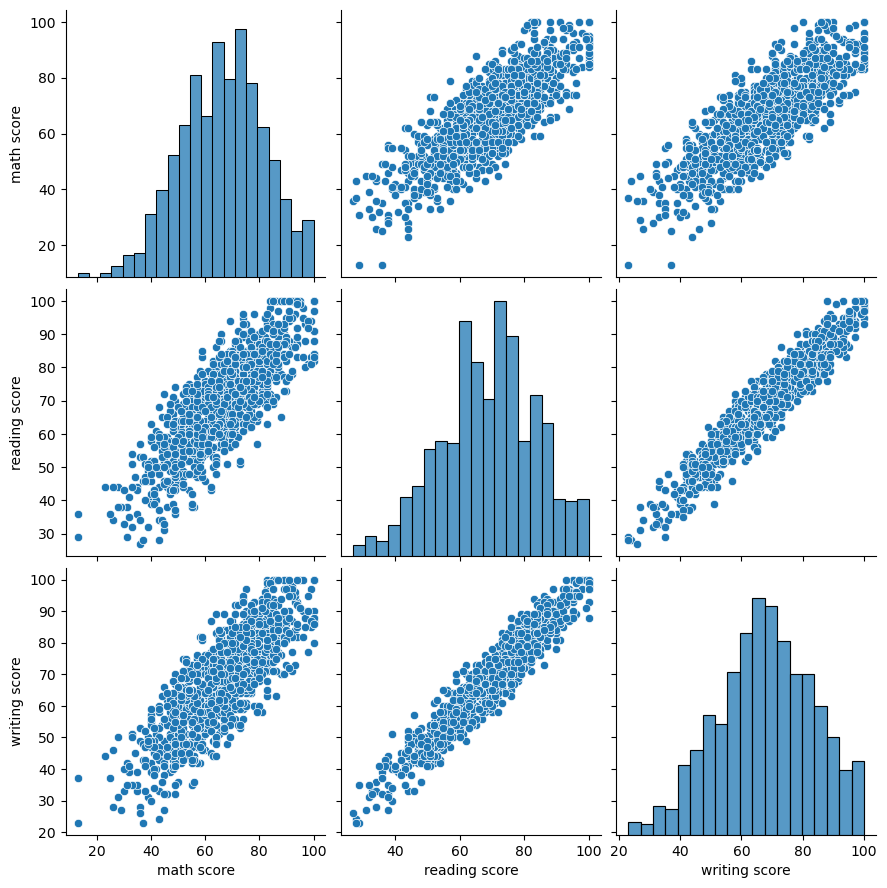

In [4]:
sns.pairplot(df[['math score', 'reading score', 'writing score']], height = 3);

### Now I would like to add columns for grade marks for each exam
>90 = A, >80 = B, >70 = C, >60 = D, >50 = E, <=50 = F

In [5]:
def ScoreMark(score):
    if ( score > 90 ):
        mark = 'A'
    elif ( score > 80):
        mark = 'B'
    elif ( score > 70):
        mark = 'C'
    elif ( score > 60):
        mark = 'D'
    elif ( score > 50):
        mark = 'E'
    else: 
        mark = 'F'
    return mark

df['math mark'] = df['math score'].apply(lambda s: ScoreMark(s))
df['reading mark'] = df['reading score'].apply(lambda s: ScoreMark(s))
df['writing mark'] = df['writing score'].apply(lambda s: ScoreMark(s))

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'math mark', 'reading mark', 'writing mark'],
      dtype='object')

### Plot histograms for the exam scores and marks

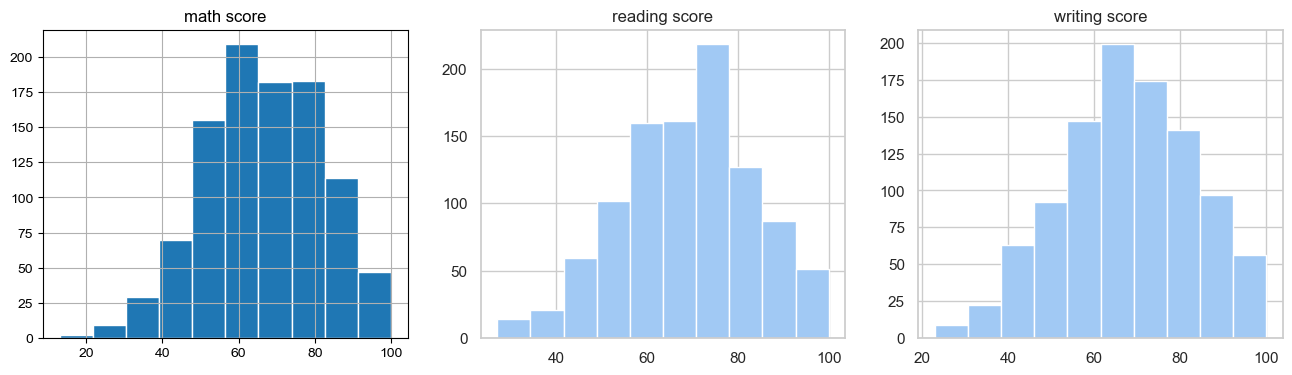

In [7]:


figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math score', 'reading score', 'writing score']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    sns.set_theme(style="whitegrid", palette="pastel")
    df[i].hist()
    n = n + 1

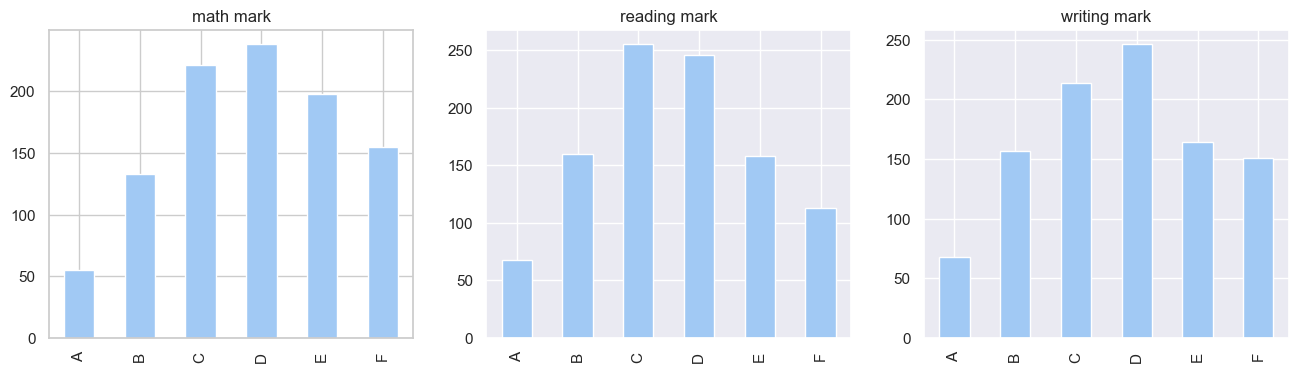

In [8]:
figure = plt.figure(figsize=(16,4))
n = 1
for i in ['math mark', 'reading mark', 'writing mark']:
    ax = figure.add_subplot(1, 3, n)
    ax.set_title(i)
    sns.set_theme(style='darkgrid', palette="pastel")
    df[i].value_counts().sort_index().plot(kind="bar")
    n = n + 1

In [9]:
#Define Boxplot function, to plot all three exam scores for different variables, check median and quartiles of the scores.

def boxpl(dt, x_cols, y_cols):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            sns.set_theme(style="whitegrid", palette="pastel")
            g.set_xticklabels(g.get_xticklabels(), rotation=20)
            n = n + 1

### Define Boxplot function, to plot all three exam scores for different variables, make sure to check median and quartiles of the scores.

### Exam score quartiles 
allocation for gender and race


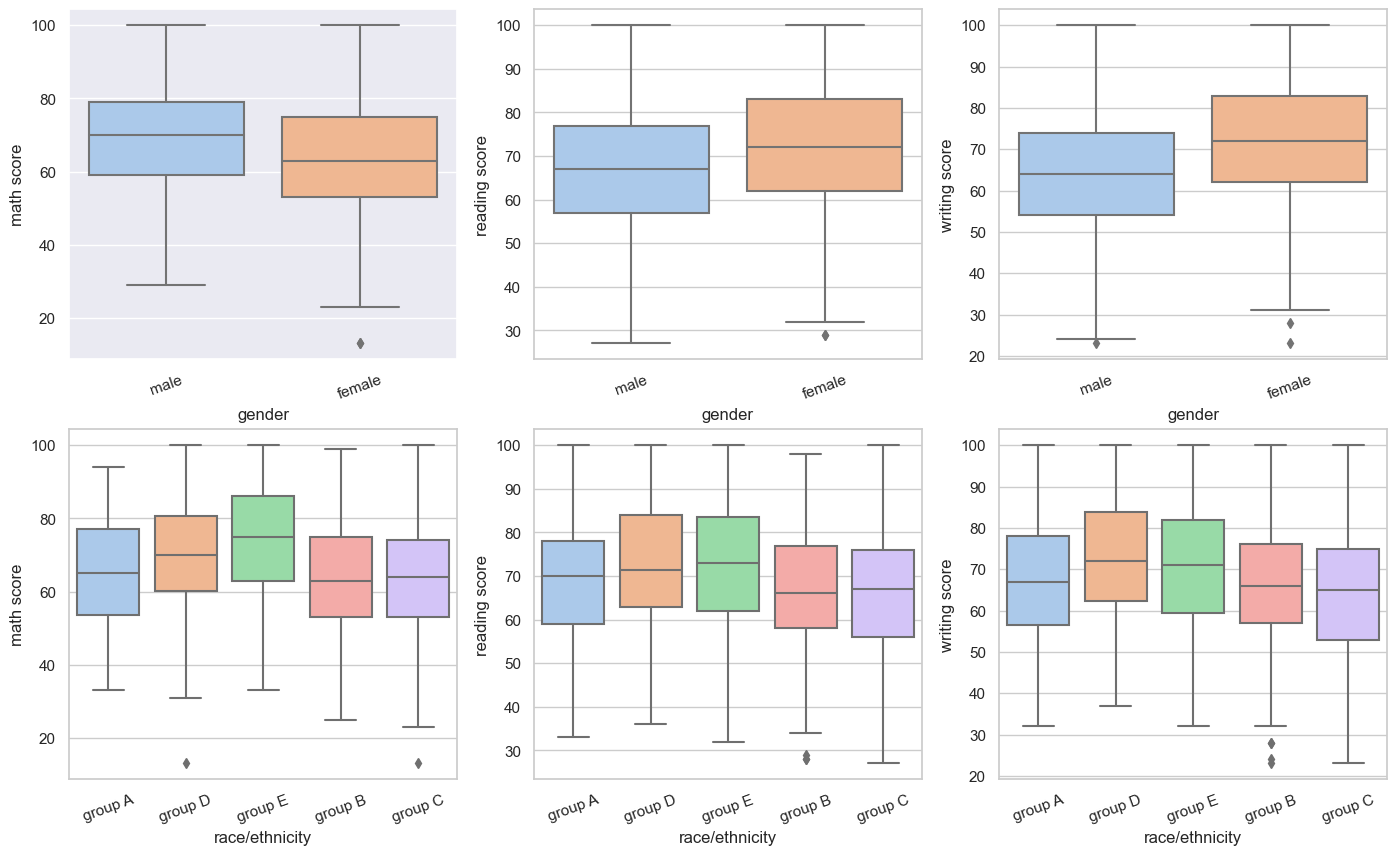

In [10]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['gender', 'race/ethnicity']
sns.set_theme(style='darkgrid', palette="pastel")
boxpl(df, x_cols, y_cols)

### Exam Score quartiles
Test preparation course and lunch variables

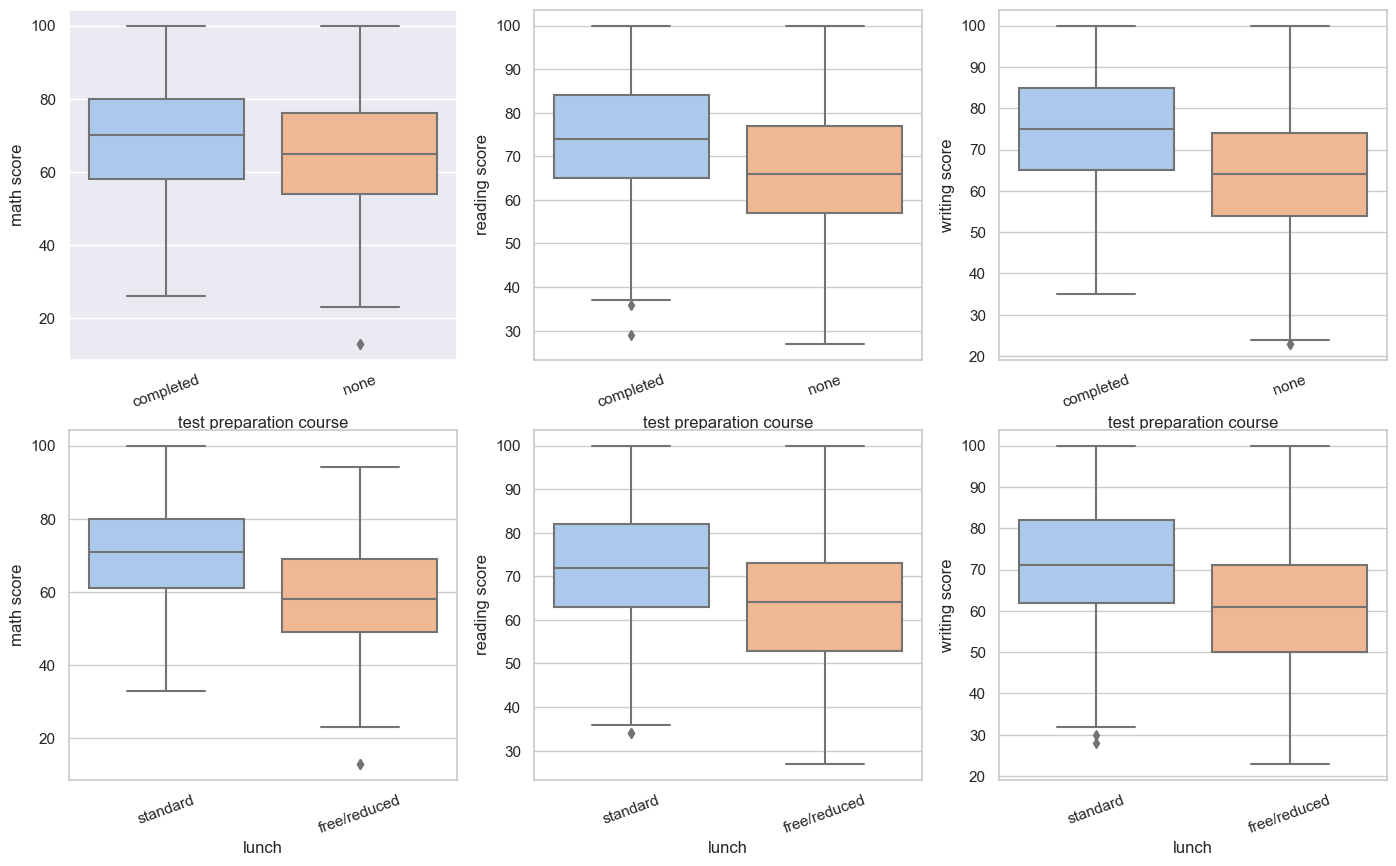

In [11]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = ['test preparation course', 'lunch']
sns.set_theme(style='darkgrid', palette="pastel")
boxpl(df, x_cols, y_cols)

### Exam score quartiles
 Parental LEvel of Education

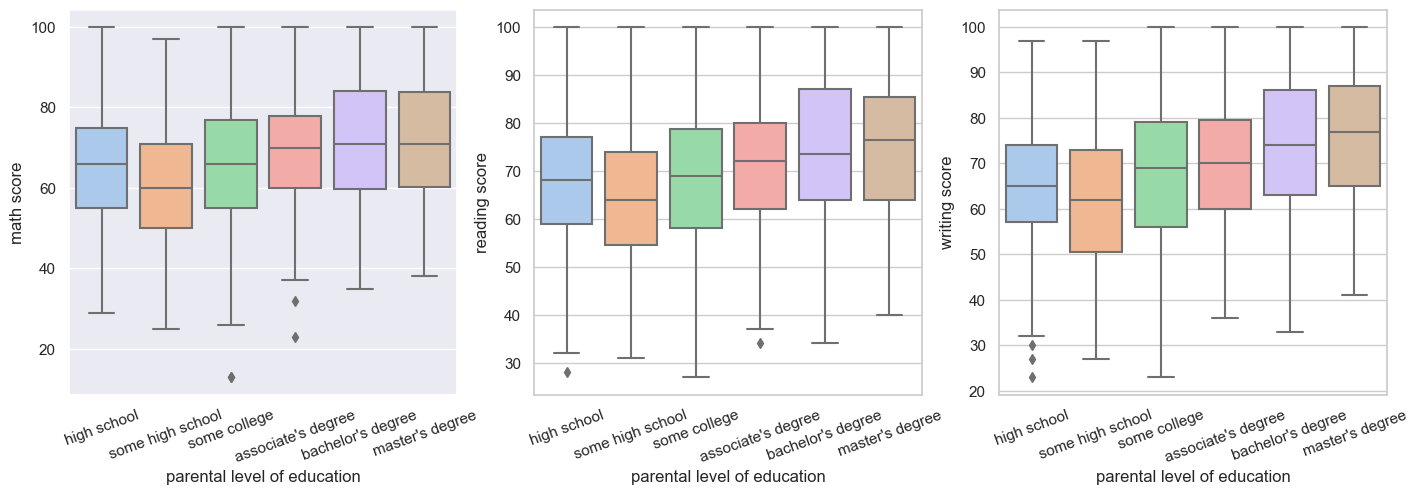

In [12]:
y_cols = ['math score', 'reading score', 'writing score']
x_cols = [ 'parental level of education']
sns.set_theme(style='darkgrid', palette="pastel")
boxpl(df, x_cols, y_cols)

### Defining the function that takes a grade mark and returns the number of students grade for each subjects

In [13]:
def getMarkData(dt, marks):
    subDt = dt[(dt['math mark'].isin(marks)) | (dt['reading mark'].isin(marks)) | (dt['writing mark'].isin(marks))]
    return subDt
    
def MarkCounts(dt, marks):
    subDt = getMarkData(dt, marks)
    print('Math: ' + str(subDt[subDt['math mark'].isin(marks)].shape[0])
      , '\n'
      , 'Writing: ' + str(subDt[subDt['writing mark'].isin(marks)].shape[0])
      , '\n'
      , 'Reading: ' + str(subDt[subDt['reading mark'].isin(marks)].shape[0])
      , '\n'
      , '\n'
      , 'Math and Reading: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['reading mark'].isin(marks))].shape[0])
      , '\n'
      , 'Math and Writing: ' + str(subDt[(subDt['math mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      ,'Reading and Writing: ' + str(subDt[(subDt['reading mark'].isin(marks)) & (subDt['writing mark'].isin(marks))].shape[0])
      , '\n'
      , '\n',
      'All: '+str(subDt[(subDt['math mark'].isin(marks))&(subDt['reading mark'].isin(marks))&(subDt['writing mark'].isin(marks))].shape[0])
     )

### Get number of students that have Failed (F), and number of students that have distinction results (A) in the exams.

In [14]:
print('F')
MarkCounts(df, ['F'])
print('\n A')
MarkCounts(df, ['A'])

F
Math: 155 
 Writing: 151 
 Reading: 113 
 
 Math and Reading: 85 
 Math and Writing: 100 
 Reading and Writing: 107 
 
 All: 82

 A
Math: 55 
 Writing: 68 
 Reading: 68 
 
 Math and Reading: 30 
 Math and Writing: 25 
 Reading and Writing: 50 
 
 All: 23


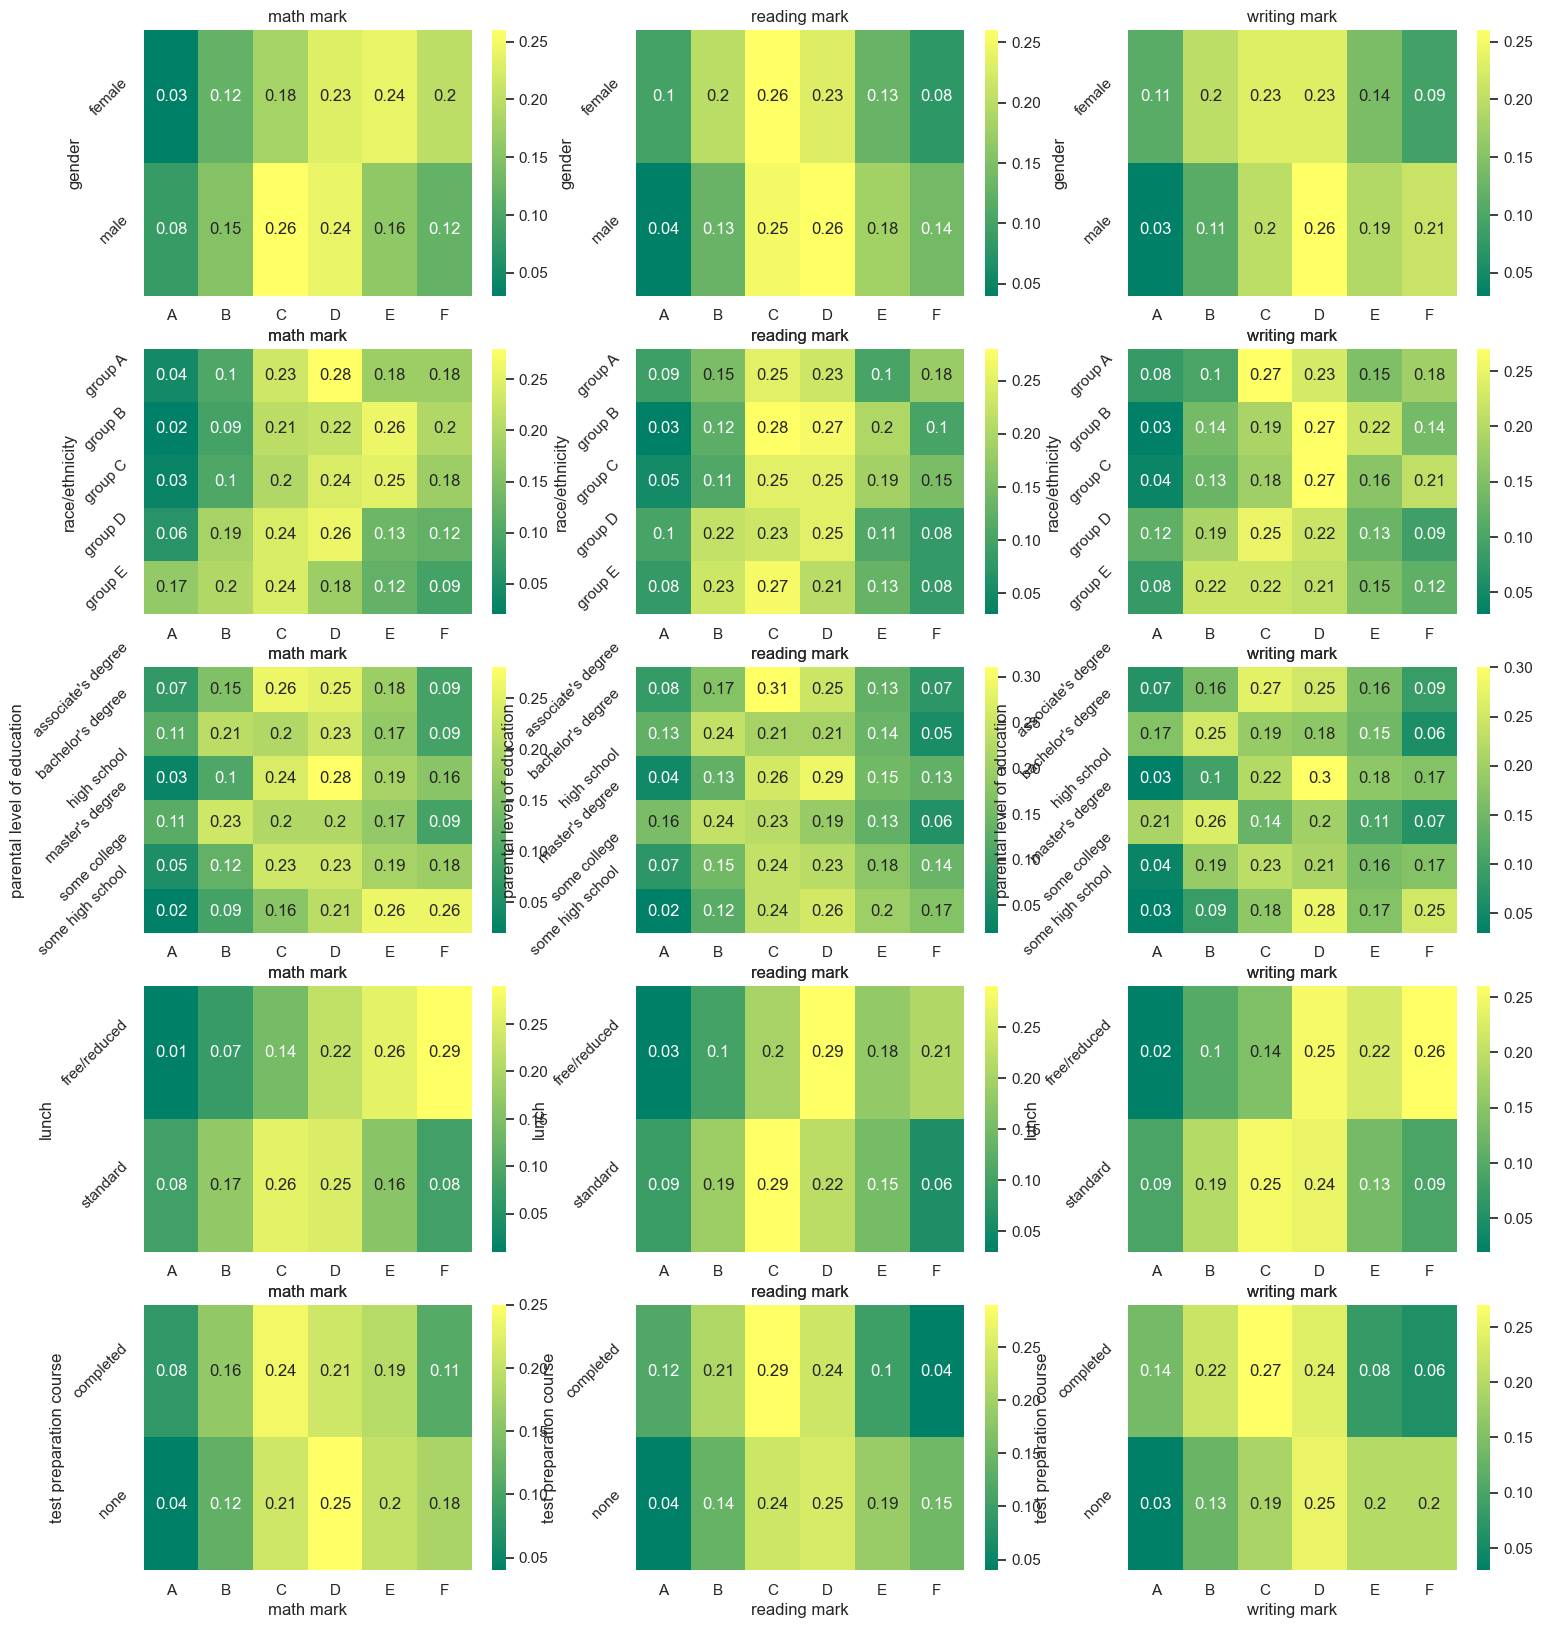

In [15]:
# Relative ratios have been added.

figure = plt.figure(figsize=(18,20))
n = 1
for k in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    for i in ['math mark', 'reading mark', 'writing mark']:
        tab = pd.crosstab(df[k], df[i])
        tab['total'] = (tab['A'] + tab['B'] + tab['C'] + tab['D'] + tab['E'] + tab['F'])        
        tab['A'] = round(tab['A'] / tab['total'], 2)
        tab['B'] = round(tab['B'] / tab['total'], 2)
        tab['C'] = round(tab['C'] / tab['total'], 2)
        tab['D'] = round(tab['D'] / tab['total'], 2)
        tab['E'] = round(tab['E'] / tab['total'], 2)
        tab['F'] = round(tab['F'] / tab['total'], 2)
        tab = tab.drop(columns=['total'])
        ax = figure.add_subplot(5, 3, n)
        ax.set_title(i)
        g = sns.heatmap(tab, annot=True, cmap='summer', fmt='g')
        g.set_yticklabels(g.get_yticklabels(), rotation=45)
        n = n + 1

### Predicting student exam failures with Classification methods

In [16]:
#pip install scikit-learn --upgrade

In [17]:
data_unseen = df.sample(n=100)
data= df.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('./Sample Pycaret 3 data/unseenDataExam.csv', index=False)

Data for model: (900, 11), 
Data for unseen predicitions: (100, 11)


In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark
0,male,group A,high school,standard,completed,67,67,63,D,D,D
1,female,group D,some high school,free/reduced,none,40,59,55,F,E,E
2,male,group E,some college,free/reduced,none,59,60,50,E,E,F
3,male,group B,high school,standard,none,77,78,68,C,C,D
4,male,group E,associate's degree,standard,completed,78,73,68,C,C,D


In [19]:
from pycaret.classification import *
s = setup(data, target = 'parental level of education', ignore_features=['math mark','reading mark','writing mark'])

,Description,Value
0,Session id,7435
1,Target,parental level of education
2,Target type,Multiclass
3,Target mapping,"associate's degree: 0, bachelor's degree: 1, high school: 2, master's degree: 3, some college: 4, some high school: 5"
4,Original data shape,"(900, 11)"
5,Transformed data shape,"(900, 12)"
6,Transformed train set shape,"(630, 12)"
7,Transformed test set shape,"(270, 12)"
8,Ignore features,3
9,Ordinal features,3


In [20]:
s.dataset_transformed

,gender,race/ethnicity_group B,race/ethnicity_group D,race/ethnicity_group A,race/ethnicity_group E,race/ethnicity_group C,lunch,test preparation course,math score,reading score,writing score,parental level of education
988,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,75.0,76.0,81.0,4
984,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,63.0,71.0,75.0,2
494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,65.0,63.0,60.0,2
529,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,63.0,67.0,71.0,1
550,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,100.0,100.0,100.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
238,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,76.0,62.0,64.0,0
188,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,73.0,65.0,64.0,2
128,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,100.0,84.0,87.0,4
974,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,59.0,59.0,58.0,5


#### Early EDA optional

In [21]:
#eda()

## Compare Models

In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.2587,0.0000,0.2587,0.2449,0.2336,0.0732,0.0757,0.6320
lr,Logistic Regression,0.2460,0.5770,0.2460,0.2291,0.2285,0.0612,0.0626,0.9990
lda,Linear Discriminant Analysis,0.2429,0.5770,0.2429,0.2364,0.2289,0.0586,0.0598,0.6400
nb,Naive Bayes,0.2317,0.5505,0.2317,0.2255,0.2171,0.0534,0.0548,0.6550
svm,SVM - Linear Kernel,0.2222,0.0000,0.2222,0.0833,0.1078,0.0273,0.0454,0.6020
et,Extra Trees Classifier,0.2222,0.5350,0.2222,0.2161,0.2142,0.0427,0.0432,0.7380
dummy,Dummy Classifier,0.2159,0.5000,0.2159,0.0467,0.0767,0.0000,0.0000,0.6290
rf,Random Forest Classifier,0.2127,0.5485,0.2127,0.2104,0.2066,0.0293,0.0299,0.6760
dt,Decision Tree Classifier,0.2079,0.5148,0.2079,0.2077,0.2040,0.0311,0.0312,0.6610
ada,Ada Boost Classifier,0.2032,0.5164,0.2032,0.2024,0.1941,0.0108,0.0108,0.6440


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=7435, solver='auto',
                tol=0.0001)

#### Create model choosen from above:

In [23]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2381,0.5162,0.2381,0.2472,0.2359,0.0609,0.0615
1,0.1429,0.4908,0.1429,0.1378,0.1358,-0.0601,-0.0608
2,0.1429,0.5405,0.1429,0.1291,0.1342,-0.0585,-0.0590
3,0.2063,0.5374,0.2063,0.2220,0.2120,0.0287,0.0288
4,0.2540,0.5673,0.2540,0.2571,0.2509,0.0741,0.0751
5,0.1587,0.5378,0.1587,0.1553,0.1563,-0.0399,-0.0401
6,0.2857,0.6040,0.2857,0.2753,0.2717,0.1157,0.1176
7,0.1587,0.4776,0.1587,0.1511,0.1525,-0.0344,-0.0346
8,0.2063,0.5254,0.2063,0.2146,0.2035,0.0159,0.0163


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Evaluate Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

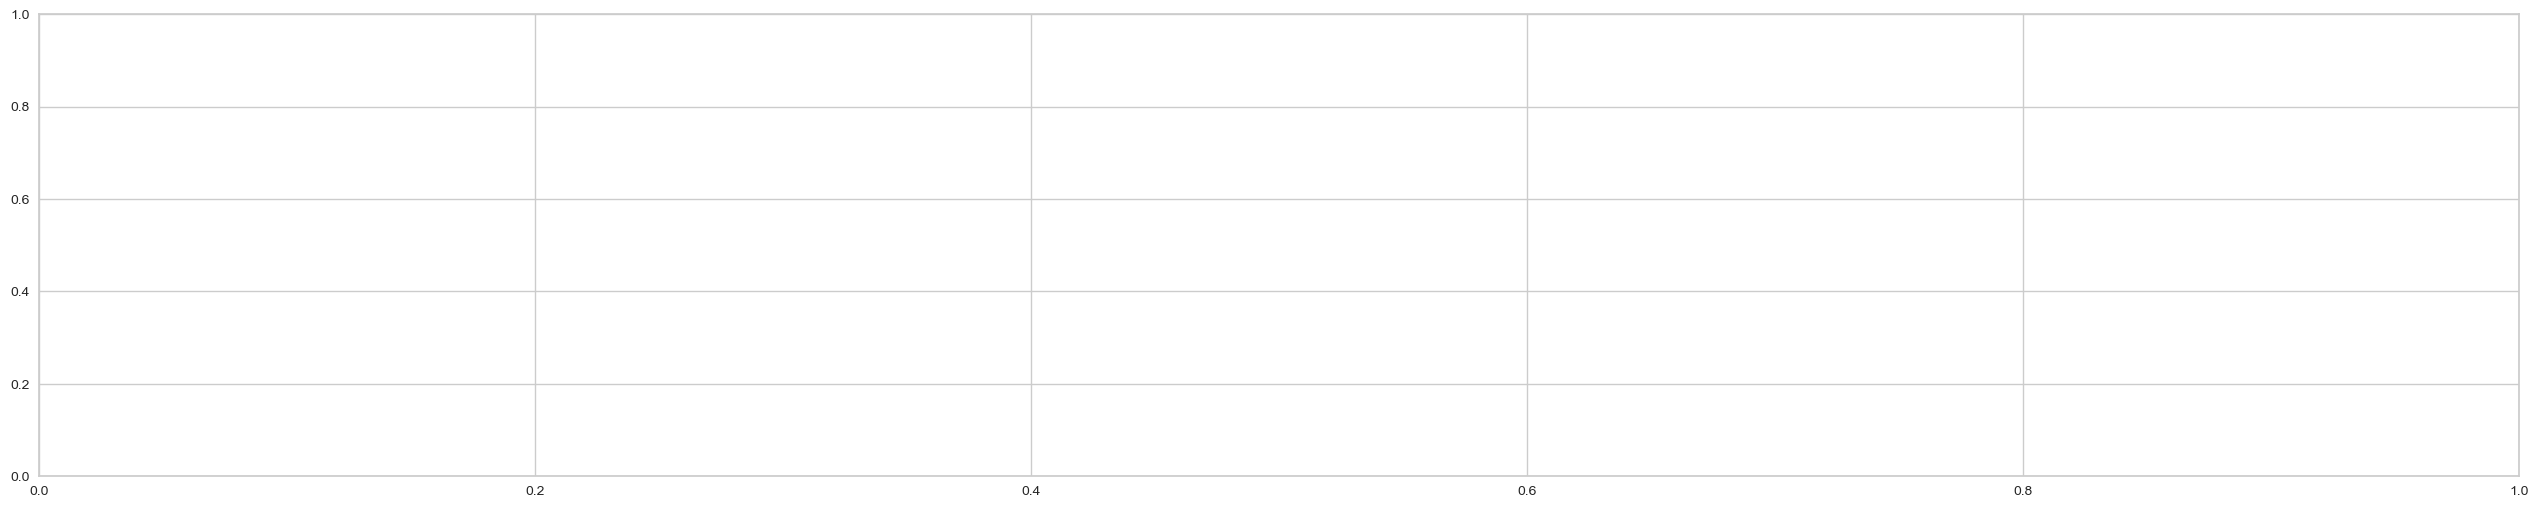

In [24]:
evaluate_model(model)

#### Print out graphs of value from the evaluation:

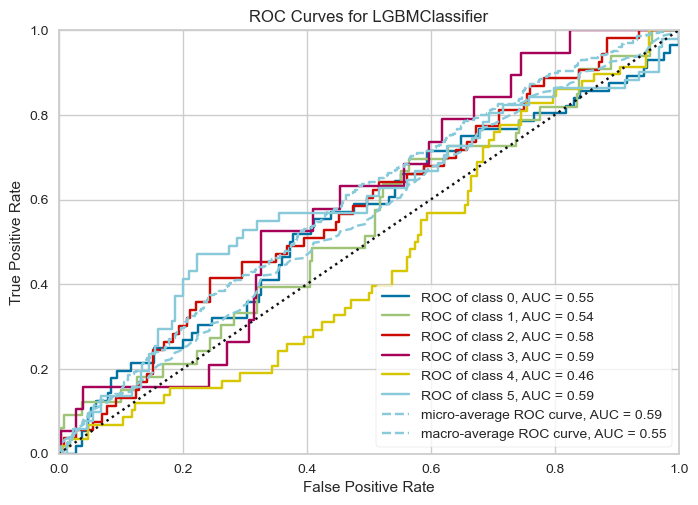

In [33]:
plot_model(model,plot='auc')

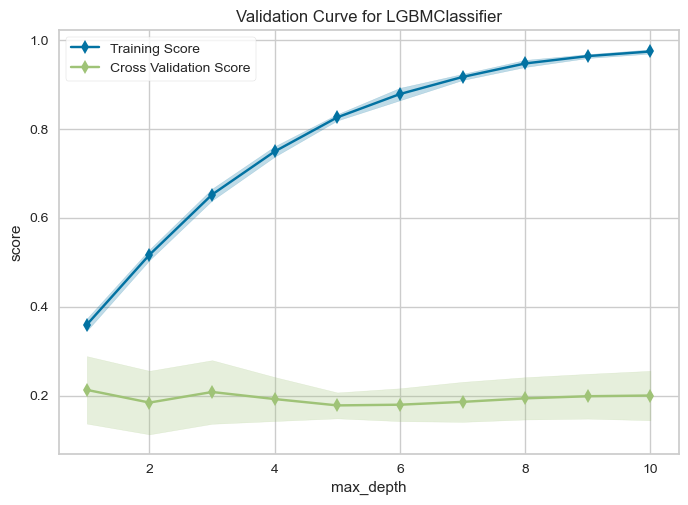

In [26]:
plot_model(model,plot='vc')

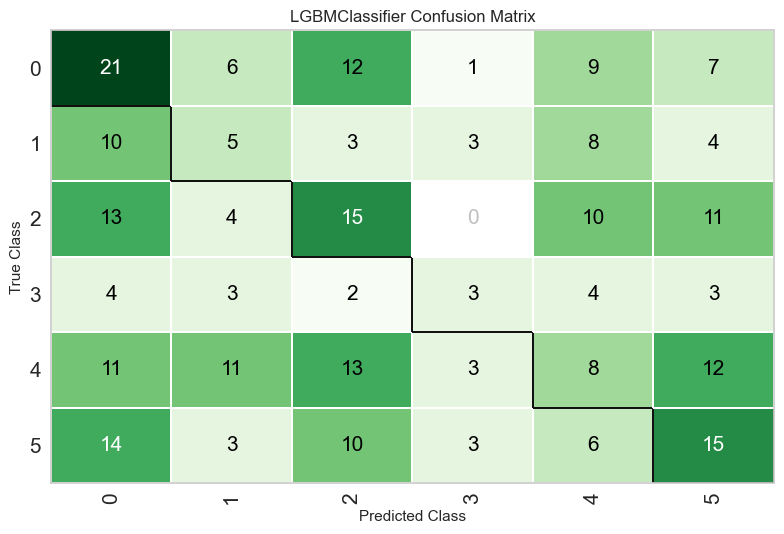

In [27]:
plot_model(model,plot='confusion_matrix')

## Predict Model Choosen

In [28]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.2481,0.5452,0,0,0,0.0762,0.0765


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label,prediction_score
421,male,group D,standard,none,76,71,70,some high school,high school,0.5755
435,female,group E,standard,none,83,87,83,some high school,some college,0.5399
821,male,group D,standard,none,65,63,64,high school,associate's degree,0.5370
849,female,group B,free/reduced,completed,57,70,68,bachelor's degree,some college,0.5703
885,male,group B,free/reduced,none,37,28,23,high school,some college,0.4205
...,...,...,...,...,...,...,...,...,...,...
238,male,group B,standard,none,76,62,64,associate's degree,associate's degree,0.3804
188,male,group D,standard,none,73,65,64,high school,high school,0.7561
128,male,group E,standard,completed,100,84,87,some college,bachelor's degree,0.4398
974,female,group B,standard,none,59,59,58,some high school,associate's degree,0.5622


## Tunning the Model (only if needed)

In [29]:
tuned_model = tune_model(model)
predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1429,0.5183,0.1429,0.0954,0.1113,-0.0762,-0.0819
1,0.0952,0.4063,0.0952,0.0843,0.0882,-0.1275,-0.1296
2,0.2698,0.6218,0.2698,0.2725,0.2480,0.0855,0.0881
3,0.2857,0.5480,0.2857,0.2288,0.2393,0.1088,0.1139
4,0.2222,0.6438,0.2222,0.0494,0.0808,0.0000,0.0000
5,0.2698,0.5286,0.2698,0.1807,0.2135,0.0881,0.0924
6,0.3175,0.6248,0.3175,0.3867,0.3029,0.1468,0.1506
7,0.3016,0.5679,0.3016,0.2481,0.2644,0.1261,0.1306
8,0.2222,0.5231,0.2222,0.1858,0.1996,0.0259,0.0266


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.2296,0.5725,0,0,0,0.0506,0.0517


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label,prediction_score
421,male,group D,standard,none,76,71,70,some high school,some college,0.3198
435,female,group E,standard,none,83,87,83,some high school,bachelor's degree,0.2271
821,male,group D,standard,none,65,63,64,high school,associate's degree,0.3000
849,female,group B,free/reduced,completed,57,70,68,bachelor's degree,some high school,0.3131
885,male,group B,free/reduced,none,37,28,23,high school,some college,0.2635
...,...,...,...,...,...,...,...,...,...,...
238,male,group B,standard,none,76,62,64,associate's degree,associate's degree,0.3344
188,male,group D,standard,none,73,65,64,high school,high school,0.2836
128,male,group E,standard,completed,100,84,87,some college,bachelor's degree,0.3056
974,female,group B,standard,none,59,59,58,some high school,some college,0.2895


In [34]:
final_model = finalize_model(tuned_model)
final_model

Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['math score', 'reading score',
                                             'writing score'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              f...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.7,
                                importance_type='split', learning_rate=0.3,
                                max_depth=-1, min_child_samples=86,
                                min_child_weight=0.001, min_split_gain=0.4,
                                n_estimators=30, n_jobs=-1, num_leaves=200,
                                objective=None, random_state=7435,
                                reg_alpha=0.2, reg_lambda=5, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

## Predict Model From Finalized

In [35]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3444,0.7049,0,0,0,0.1886,0.1898


,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education,prediction_label,prediction_score
421,male,group D,standard,none,76,71,70,some high school,high school,0.3650
435,female,group E,standard,none,83,87,83,some high school,some college,0.2606
821,male,group D,standard,none,65,63,64,high school,high school,0.3871
849,female,group B,free/reduced,completed,57,70,68,bachelor's degree,some high school,0.2045
885,male,group B,free/reduced,none,37,28,23,high school,some high school,0.3098
...,...,...,...,...,...,...,...,...,...,...
238,male,group B,standard,none,76,62,64,associate's degree,associate's degree,0.2748
188,male,group D,standard,none,73,65,64,high school,high school,0.3630
128,male,group E,standard,completed,100,84,87,some college,bachelor's degree,0.2714
974,female,group B,standard,none,59,59,58,some high school,some high school,0.2654


#### Optional: using predict model on all the data (Note: raw_score = True- gives the probablity of prediction 

In [37]:
#gbr_pred_all = predict_model(gbr, data=data, raw_score=True)
#gbr_pred_all

## Save Model

In [38]:
save_model(final_model, './Data/final_model_classificationPL_StudentGrade.csv')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['math score', 'reading score',
                                              'writing score'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               f...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.7,
                                 importance_type='split', learning_rate=0.3,
                                 max_depth=-1

## Load Model

In [39]:
loaded_model = load_model('./Data/final_model_classificationPL_StudentGrade.csv')

Transformation Pipeline and Model Successfully Loaded


In [40]:
pred = predict_model(loaded_model, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.2300,0.5007,0,0,0,0.0268,0.0271


In [41]:
pred

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,math mark,reading mark,writing mark,parental level of education,prediction_label,prediction_score
345,male,group D,free/reduced,none,63,60,54,D,E,E,some college,high school,0.3076
273,female,group E,standard,none,93,100,93,A,A,A,high school,bachelor's degree,0.2948
981,male,group C,standard,none,64,48,48,D,F,F,some college,some high school,0.3190
403,female,group B,standard,completed,65,63,66,D,D,D,some college,high school,0.2558
13,male,group C,standard,completed,74,74,73,C,C,C,high school,associate's degree,0.3396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,male,group B,standard,completed,76,79,76,C,C,C,associate's degree,associate's degree,0.2715
191,female,group B,standard,none,33,51,51,F,E,E,some high school,some high school,0.3234
336,male,group D,free/reduced,none,43,68,58,F,D,E,some college,some high school,0.3879
156,male,group B,free/reduced,none,64,64,59,D,D,E,high school,high school,0.2935
